In [1]:
using DataFrames, GraphPlot, Impute, Plots, Colors

dir = "../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

## UN SENTIDO Heurística de tiempo euclideano

In [2]:
k = 5
m = k^2
SquareNet, position_array, dist_matrix = SquareDiGraph(k);

In [3]:
origin_sq = 21
destination_sq = 15
println("$origin_sq - $destination_sq")

21 - 15


### City Matrix
Es un arreglo 3 dimensional que contiene:

- El tiempo mínimo que se requiere para recorrer cada arista (siguiendo la regla de velocidad máxima de la ciudad.

In [4]:
city_matrix = zeros(m,m,4);

In [5]:
f = x -> [speed(i,j,x) for i in 1:length(x),j in 1:length(x)]

#118 (generic function with 1 method)

In [6]:
city_matrix[:,:,1] = dist_matrix./f(position_array);

- La capacidad de cada arista, que se calcula como: $\frac{lc}{5}$, donde $l$ es la longitud de la calle en metros y $c$ el número de carriles.

In [7]:
city_matrix[:,:,2] = dist_matrix./5;

- El número de autos que hay en cada arista. Antes de empezar la simulación es 0 en todas las aristas, y 
- El valor según la función BPR para cada arista

In [8]:
city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2]);

### Función de avance de los autos
- Los automóviles siguen las rutas establecidas por el algoritmo A\*.
- En cada tiempo se mantiene la información de cuántos autos hay en cada arista en la forma de una matriz de adyacencia y se calcula la función BPR para establecer la velocidad real en cada una de ellas.
- Los autos avanzan a través de sus rutas planeadas pero a la velocidad establecida por la función BPR.
- Los autos guardan información de la velocidad real que tuvieron en cada arista y usarán esa información en una heurística de memoria la próxima vez que calculen su ruta.

In [9]:
red_cuadrada=network(SquareNet,position_array,city_matrix);

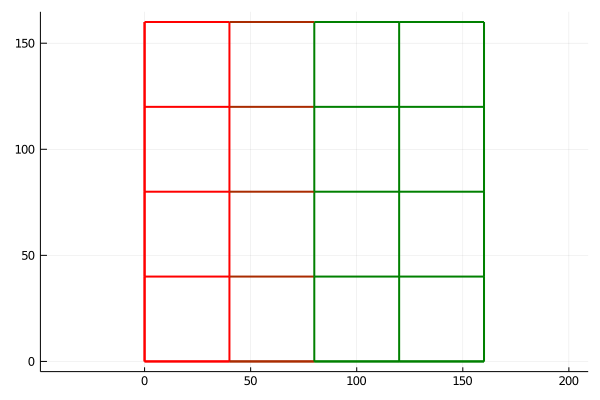

In [10]:
plot_digraph(SquareNet, position_array,attribute_matrix=city_matrix[:,:,4], separated_edges=false)

#### Objeto automovil
- Tiene que tener memoria de los últimos viajes, cuánto tarda en realidad en ir de i a j.
- Tiene que calcular A* al inicio de cada viaje
- Debe tener información sobre su origen y su destino

In [11]:
auto1 = auto(origin_sq,destination_sq,0.25,.25,red_cuadrada);
auto2 = auto(origin_sq,destination_sq,1.00,1.,red_cuadrada);
auto3 = auto(7,19,7.30,.25,red_cuadrada);
auto4 = auto(18,1,8.35,.25,red_cuadrada);
auto5 = auto(20,8,10.5,.25,red_cuadrada);

una vez que el auto ha completado su trayectoria, debe actualizar su camino calculado, pesado por qué tanta importancia le da el automovilista a sus recuerdos.

Conforme el auto va avanzando debe ir guardando los tiempos reales entre los nodos, esto se hará utilizando un diccionario.

### Simulación de los autos
- En cada tiempo se busca cuál es el siguiente evento:
    - Un auto cambia de arista
    - Un auto sale de su origen
    - Un auto llega a su destino
- Se recorrerá el tiempo y cada auto (para el que aplique la condición) avanzará sobre la arista donde va avanzando.
- Cada vez que un auto cambie de arista cambiará la velocidad reportada para el nodo al que llegó
- Una vez que acabe la simulación, los autos actualizan su camino A* usando la heurística de memoria.


In [12]:
autos = [auto1, auto2, auto3, auto4, auto5];

In [13]:
times, vels = simulacion!(0.,red_cuadrada, autos);

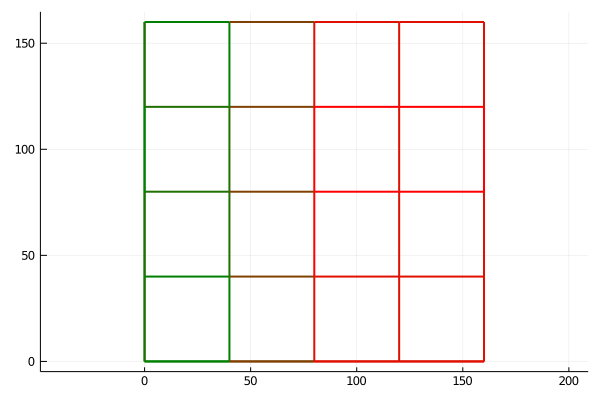

In [14]:
plot_digraph(SquareNet,position_array, attribute_matrix=vels,separated_edges=false)

In [15]:
new_times, x_out, y_out, x_dest, y_dest = continuos_time!(times,autos);

In [16]:
c1 = colorant"red"
c2 = colorant"blue"
carcolors = range(c1, stop=c2, length=5)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/firstdaynodiag-1sent.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/gifs/firstdaynodiag-1sent.gif")
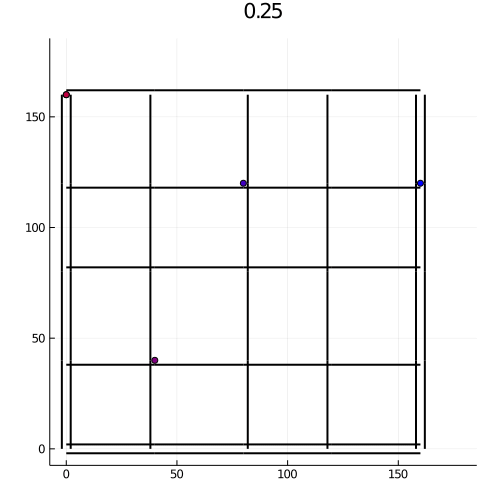

In [17]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet, position_array, separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors, aspect_ratio =1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false, 
        mcolor = RGB(0,1,0), aspect_ratio =1, size=(500,500))
end
gif(anim, "../gifs/firstdaynodiag-1sent.gif", fps = 50)

In [18]:
restart(autos, red_cuadrada)
times, vels = simulacion!(0.,red_cuadrada, autos);

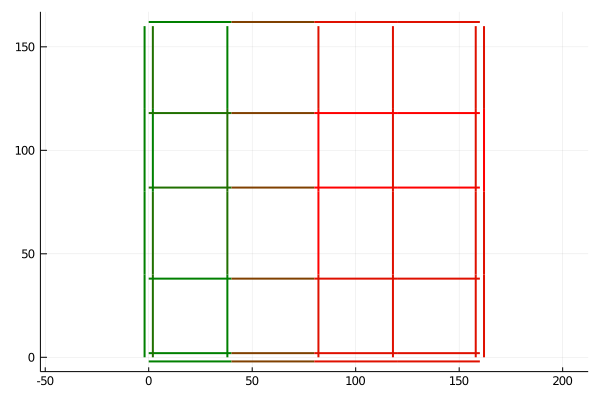

In [19]:
plot_digraph(SquareNet, position_array, attribute_matrix=vels,separated_edges=true)

In [20]:
new_times, x_out, y_out, x_dest, y_dest = continuos_time!(times,autos);

In [21]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet,position_array,separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors,aspect_ratio = 1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false,
        mcolor = RGB(0,1,0),aspect_ratio = 1, size=(500,500))
end
gif(anim, "../gifs/seconddaynodiag-1sent.gif", fps = 50)

# Agregar la diagonal y hacer las esquinas lentas

In [ ]:
nw,posarr,distm = SquareDiGraph(5, doble_sentido=false);

In [ ]:
diag_start = [7.,160.]
pendiente = -pi/5

In [ ]:
nw, posarr, distm, new_positions = add_diagonal!(nw,posarr,diag_start, pendiente, 5.,40.);

In [ ]:
SquareNet, position_array, dist_matrix = make_slow_corners(nw,posarr,new_positions);

In [ ]:
plot_digraph(SquareNet, position_array, separated_edges=true)

In [ ]:
k = nv(nw);
city_matrix = zeros(k, k,4);

In [ ]:
f = x -> [speed(i,j,x) for i in 1:length(x),j in 1:length(x)]

In [ ]:
city_matrix[:,:,1] = dist_matrix./f(position_array);

In [ ]:
city_matrix[:,:,2] = max.(dist_matrix.*3/5,ones(k,k));

In [ ]:
city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2]);

In [ ]:
red_cuadrada=network(SquareNet,position_array,city_matrix);

In [ ]:
plot_digraph(SquareNet, position_array, attribute_matrix=dist_matrix./city_matrix[:,:,4], separated_edges=true)

In [ ]:
auto1 = auto(origin_sq,destination_sq,0.25,.25,red_cuadrada);
auto2 = auto(origin_sq,destination_sq,1.00,1.,red_cuadrada);
auto3 = auto(7,19,7.30,.25,red_cuadrada);
auto4 = auto(18,1,8.35,.25,red_cuadrada);
auto5 = auto(20,8,10.5,.25,red_cuadrada);

In [ ]:
autos = [auto1, auto2, auto3, auto4, auto5];

In [ ]:
times, vels = simulacion!(0.,red_cuadrada, autos);

In [ ]:
plot_digraph(SquareNet, position_array, attribute_matrix=vels,separated_edges=true)

In [ ]:
new_times, x_out, y_out, x_dest, y_dest = continuos_time!(times,autos);

In [ ]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet, position_array, separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors,aspect_ratio = 1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false,
        mcolor = RGB(0,1,0),aspect_ratio = 1, size=(500,500))
end
gif(anim, "../gifs/firstdaydiag-1sent.gif", fps = 50)

In [ ]:
restart(autos, red_cuadrada);
times, vels = simulacion!(0.,red_cuadrada, autos);

In [ ]:
new_times, coordenadasx_grafica, coordenadasy_grafica = continuos_time!(times,autos);

In [ ]:
anim = @animate for i in 1:10:length(new_times)
    x = [element[i] for element in x_out]
    y = [element[i] for element in y_out]
    x2 = [element[i] for element in x_dest]
    y2 = [element[i] for element in y_dest]
    fig = plot_digraph(SquareNet, position_array, separated_edges=true)

    scatter!(x, y, xlim=[-2,180],ylim=[-2,180], labels=false, title = string(new_times[i]),
        mcolor = carcolors,aspect_ratio = 1, size=(500,500))
    scatter!(x2, y2, xlim=[-2,180],ylim=[-2,180], labels=false,
        mcolor = RGB(0,1,0),aspect_ratio = 1, size=(500,500))
end
gif(anim, "../gifs/seconddaydiag-1sent.gif", fps = 50)